In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [2]:
feat = ['feat_{}'.format(i) for i in range(12)]

df = pd.read_csv('./dataset/jung_pha1.csv', names=feat)

df

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11
0,tick,phase,nose_shoulder_angle,left_elbow_angle,right_elbow_angle,right_knee_angle,left_knee_angle,shoulder_angle,right_ankle_angle,right_hip_angle,left_ankle_angle,left_hip_angle
1,1,0,60.72588998,177.3460742,176.7026647,176.8088442,175.9024915,172.360475,172.8671503,0.610396897,156.8124633,2.142409084
2,2,0,60.50485551,178.510853,177.074815,177.7654036,178.774223,172.8063187,174.2661776,0.250456155,158.6677406,3.494882141
3,3,0,58.33250319,179.0006267,176.0538324,177.3685957,179.6361985,174.5298348,171.7758925,0.107370191,154.7168454,4.571375872
4,4,0,58.27248891,179.2873072,176.0943607,177.1870217,179.2263156,174.9476908,171.6851582,0.280711388,154.141191,4.423470473
...,...,...,...,...,...,...,...,...,...,...,...,...
310,310,1,55.45297544,171.0598767,137.6081338,167.5847927,178.5469219,177.0007905,130.6141249,1.877353051,113.1960826,5.098941173
311,311,1,55.0423374,171.8460171,155.9028413,168.379407,178.1687757,178.3289822,126.0311248,2.104899919,107.044547,4.945592161
312,312,1,54.77316128,172.1445395,161.8132375,170.6407373,178.951887,179.1695716,120.8513845,0.973246182,99.51642992,5.255277214
313,313,1,55.48523589,172.1550318,168.8844083,172.2662406,179.2520639,179.7245001,120.4646967,0.956397423,105.0261303,4.178911982


In [3]:
df.dtypes

feat_0     object
feat_1     object
feat_2     object
feat_3     object
feat_4     object
feat_5     object
feat_6     object
feat_7     object
feat_8     object
feat_9     object
feat_10    object
feat_11    object
dtype: object

In [4]:
df1 = df

In [5]:
df1 = df.apply(pd.to_numeric, errors='coerce')

In [6]:

df1.dropna(inplace=True)
df1

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11
1,1.0,0.0,60.725890,177.346074,176.702665,176.808844,175.902491,172.360475,172.867150,0.610397,156.812463,2.142409
2,2.0,0.0,60.504856,178.510853,177.074815,177.765404,178.774223,172.806319,174.266178,0.250456,158.667741,3.494882
3,3.0,0.0,58.332503,179.000627,176.053832,177.368596,179.636199,174.529835,171.775892,0.107370,154.716845,4.571376
4,4.0,0.0,58.272489,179.287307,176.094361,177.187022,179.226316,174.947691,171.685158,0.280711,154.141191,4.423470
5,5.0,0.0,58.660763,178.947536,176.156688,177.563194,178.508390,174.940494,171.680656,0.183633,151.785437,4.588570
...,...,...,...,...,...,...,...,...,...,...,...,...
310,310.0,1.0,55.452975,171.059877,137.608134,167.584793,178.546922,177.000790,130.614125,1.877353,113.196083,5.098941
311,311.0,1.0,55.042337,171.846017,155.902841,168.379407,178.168776,178.328982,126.031125,2.104900,107.044547,4.945592
312,312.0,1.0,54.773161,172.144540,161.813238,170.640737,178.951887,179.169572,120.851384,0.973246,99.516430,5.255277
313,313.0,1.0,55.485236,172.155032,168.884408,172.266241,179.252064,179.724500,120.464697,0.956397,105.026130,4.178912


In [7]:
Y = df1['feat_1']
Y = to_categorical(Y)

df1.drop(['feat_1'], axis=1, inplace=True)



In [8]:
X_train = np.asarray(df1[:-100].values.tolist(), dtype=np.float64)
X_test = np.asarray(df1[-100:].values.tolist(), dtype=np.float64)


In [9]:

Y_train = Y[:-100]
Y_test = Y[-100:]

X_train = X_train[:200]
Y_train = Y_train[:200]


In [10]:
X_train = X_train.reshape(-1, 20, 11)
Y_train = Y_train.reshape(-1, 20, 2)
X_test = X_test.reshape(-1, 10, 11)
Y_test = Y_test.reshape(-1, 10, 2)

In [11]:
print(X_train.shape)

(10, 20, 11)


In [12]:
print(X_test.shape)

(10, 10, 11)


In [13]:
#X_train = X_train.reshape(214, 11)
##Y_train = Y_train.reshape(214, 2)
#X_test = X_test.reshape(100, 11)
#Y_test = Y_test.reshape(100, 2)

In [14]:
#X_train = X_train.reshape(214, 11, -1)
#Y_train = Y_train.reshape(214, 2, -1)
#X_test = X_test.reshape(100, 11, -1)
#Y_test = Y_test.reshape(100, 2, -1)

In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(20, 11, ), return_sequences=True))
model.add(LSTM(256, return_sequences=True))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20, 128)           71680     
                                                                 
 lstm_1 (LSTM)               (None, 20, 256)           394240    
                                                                 
 dense (Dense)               (None, 20, 2)             514       
                                                                 
Total params: 466,434
Trainable params: 466,434
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(X_train.shape)
print(Y_train.shape)

(10, 20, 11)
(10, 20, 2)


In [39]:
hist = model.fit(X_train, Y_train, epochs=10, batch_size=1, validation_split=0.2)

Epoch 1/10
8/8 [==============================] - 0s 22ms/step - loss: 6.2090e-05 - accuracy: 1.0000 - val_loss: 3.2647 - val_accuracy: 0.8250
Epoch 2/10
8/8 [==============================] - 0s 20ms/step - loss: 6.4179e-05 - accuracy: 1.0000 - val_loss: 3.3999 - val_accuracy: 0.8250
Epoch 3/10
8/8 [==============================] - 0s 20ms/step - loss: 6.0732e-05 - accuracy: 1.0000 - val_loss: 3.3606 - val_accuracy: 0.8250
Epoch 4/10
8/8 [==============================] - 0s 20ms/step - loss: 6.1357e-05 - accuracy: 1.0000 - val_loss: 3.3311 - val_accuracy: 0.8250
Epoch 5/10
8/8 [==============================] - 0s 21ms/step - loss: 6.0787e-05 - accuracy: 1.0000 - val_loss: 3.2322 - val_accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 0s 20ms/step - loss: 5.8707e-05 - accuracy: 1.0000 - val_loss: 3.2807 - val_accuracy: 0.8250
Epoch 7/10
8/8 [==============================] - 0s 19ms/step - loss: 6.2246e-05 - accuracy: 1.0000 - val_loss: 3.3700 - val_accuracy: 0.8250

In [44]:
hist = model.fit(X_train, Y_train, epochs=100, batch_size=1, validation_split=0.2)

Epoch 1/100
8/8 [==============================] - 0s 21ms/step - loss: 6.1380e-05 - accuracy: 1.0000 - val_loss: 3.3452 - val_accuracy: 0.8250
Epoch 2/100
8/8 [==============================] - 0s 22ms/step - loss: 6.1022e-05 - accuracy: 1.0000 - val_loss: 3.2207 - val_accuracy: 0.8000
Epoch 3/100
8/8 [==============================] - 0s 17ms/step - loss: 5.6936e-05 - accuracy: 1.0000 - val_loss: 3.3271 - val_accuracy: 0.8250
Epoch 4/100
8/8 [==============================] - 0s 19ms/step - loss: 5.9427e-05 - accuracy: 1.0000 - val_loss: 3.3978 - val_accuracy: 0.8250
Epoch 5/100
8/8 [==============================] - 0s 21ms/step - loss: 5.9868e-05 - accuracy: 1.0000 - val_loss: 3.2990 - val_accuracy: 0.8250
Epoch 6/100
8/8 [==============================] - 0s 19ms/step - loss: 5.5609e-05 - accuracy: 1.0000 - val_loss: 3.3918 - val_accuracy: 0.8250
Epoch 7/100
8/8 [==============================] - 0s 21ms/step - loss: 5.6005e-05 - accuracy: 1.0000 - val_loss: 3.3609 - val_accuracy:

In [23]:
hist['loss']

TypeError: 'History' object is not subscriptable

In [47]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


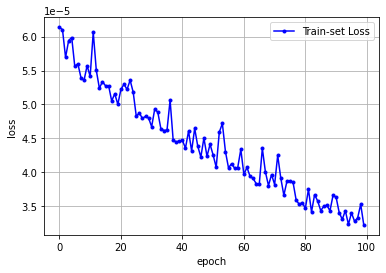

In [55]:
# x_len = numpy.arange(len(y_loss))
x_len = list(range(len(hist.history['loss'])))
y_loss = hist.history['loss']
# plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# model _ predict (test)
